In [1]:
import numpy as hp
import pandas as hs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
dataset = sns.load_dataset('taxis')

In [6]:
dataset

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [7]:
data = dataset.drop(['dropoff','pickup','passengers','distance','tolls','payment','pickup_zone','dropoff_zone','color','pickup_borough','dropoff_borough'],axis=1)

In [8]:
data

,fare,tip,total
0,7.0,2.15,12.95
1,5.0,0.00,9.30
2,7.5,2.36,14.16
3,27.0,6.15,36.95
4,9.0,1.10,13.40
...,...,...,...
6428,4.5,1.06,6.36
6429,58.0,0.00,58.80
6430,16.0,0.00,17.30
6431,6.0,0.00,6.80


In [9]:
x = data.iloc[:,1:3].values
y = data.iloc[:,0].values.reshape(-1,1)

In [10]:
x

array([[ 2.15, 12.95],
       [ 0.  ,  9.3 ],
       [ 2.36, 14.16],
       ...,
       [ 0.  , 17.3 ],
       [ 0.  ,  6.8 ],
       [ 3.36, 20.16]])

In [11]:
y

array([[ 7. ],
       [ 5. ],
       [ 7.5],
       ...,
       [16. ],
       [ 6. ],
       [15. ]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape

(5146, 2)

In [15]:
x_test.shape

(1287, 2)

In [16]:
y_train.shape

(5146, 1)

In [17]:
y_test.shape

(1287, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(x_test)

In [22]:
y_pred

array([[57.26705185],
       [15.31609627],
       [ 6.63869592],
       ...,
       [ 5.88476314],
       [ 5.68948537],
       [ 5.21488009]])

In [24]:
check=hs.DataFrame(y_test,columns=['Actual fare'])

In [25]:
check['predicted fare'] = y_pred

In [26]:
check

,Actual fare,predicted fare
0,52.0,57.267052
1,16.0,15.316096
2,6.0,6.638696
3,5.0,5.249333
4,17.0,16.674312
...,...,...
1282,7.0,7.325508
1283,5.5,4.265670
1284,5.5,5.884763
1285,5.0,5.689485


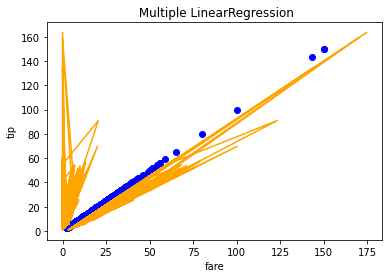

In [27]:
plt.scatter(y_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='orange')
plt.title(' Multiple LinearRegression')
plt.xlabel('fare')
plt.ylabel('tip')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
mean_squared_error(y_test,y_pred)

2.4086808726467015

In [30]:
mean_absolute_error(y_test,y_pred)

1.0141935683225485

In [31]:
r2_score(y_test,y_pred)

0.9846575106725431